Importing required packages

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

/Users/tanvirniaz/Documents/Python/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading the dataset

In [4]:
df = pd.read_csv("AppleStore.csv")
df.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
df.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


Missing values

In [6]:
count_missing = df.isnull().sum() 
count_missing.sort_values(ascending = False)

vpp_lic             0
rating_count_ver    0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
user_rating         0
lang.num            0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
Unnamed: 0          0
dtype: int64

We can see that that are no missing values

Visualize data

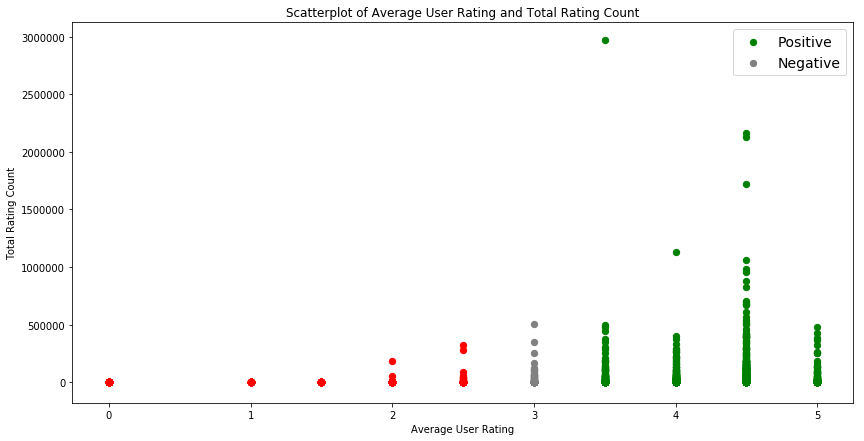

In [7]:
plt.figure(figsize=(14,7))
ax=plt.subplot()
ax.scatter(df[df['user_rating']>3]['user_rating'],df[df['user_rating']>3]['rating_count_tot'],c='green',s=40)
ax.scatter(df[df['user_rating']==3]['user_rating'],df[df['user_rating']==3]['rating_count_tot'],c='grey',s=40)
ax.scatter(df[df['user_rating']<3]['user_rating'],df[df['user_rating']<3]['rating_count_tot'],c='red',s=40)
ax.set_xlabel('Average User Rating')
ax.set_ylabel('Total Rating Count')
ax.set_title('Scatterplot of Average User Rating and Total Rating Count')
ax.legend(('Positive','Negative'),scatterpoints=1,loc='upper right',fontsize=14)

Feature engineering and selection

In [8]:
df['track_name_length'] = df['track_name'].str.len() #new feature of length of app name

In [9]:
df.currency.unique() #all USD values, so can drop this column

array(['USD'], dtype=object)

In [10]:
df.price.unique() #label encode as not a standard distribution to bin

array([  3.99,   0.  ,   0.99,   9.99,   4.99,   7.99,   2.99,   1.99,
         5.99,  12.99,  21.99, 249.99,   6.99,  74.99,  19.99,   8.99,
        24.99,  13.99,  14.99,  16.99,  47.99,  11.99,  59.99,  15.99,
        27.99,  17.99, 299.99,  49.99,  23.99,  20.99,  39.99,  99.99,
        29.99,  34.99,  18.99,  22.99])

In [11]:
#create two new ratio features for rating and total rating count
df['user_rating_ratio'] = df['user_rating_ver']/df['user_rating']
df['total_rating_ratio']=df['rating_count_ver']/df['rating_count_tot']

In [10]:
df.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_length,user_rating_ratio,total_rating_ratio
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,15,1.125000,0.001221
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,25,0.875000,0.000161
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,47,1.285714,0.014964
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,50,1.125000,0.002475
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,5,1.111111,0.005396


In [12]:
df=df.drop(df.columns[0], axis=1) #dropping columns that are not needed or redundant features

In [13]:
drop_elements=['id','track_name','currency','rating_count_ver', 'user_rating_ver', 'ver', 'cont_rating','sup_devices.num','ipadSc_urls.num','lang.num', 'vpp_lic']

In [14]:
df=df.drop(df[drop_elements], axis=1)

In [15]:
df.head(5)

,size_bytes,price,rating_count_tot,user_rating,prime_genre,track_name_length,user_rating_ratio,total_rating_ratio
0,100788224,3.99,21292,4.0,Games,15,1.125000,0.001221
1,158578688,0.00,161065,4.0,Productivity,25,0.875000,0.000161
2,100524032,0.00,188583,3.5,Weather,47,1.285714,0.014964
3,128512000,0.00,262241,4.0,Shopping,50,1.125000,0.002475
4,92774400,0.00,985920,4.5,Reference,5,1.111111,0.005396


In [16]:
df.describe()

,size_bytes,price,rating_count_tot,user_rating,track_name_length,user_rating_ratio,total_rating_ratio
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,6268.000000,6268.000000
mean,1.991345e+08,1.726218,1.289291e+04,3.526956,25.582465,0.922277,0.241688
std,3.592069e+08,5.833006,7.573941e+04,1.517948,17.113720,0.326633,0.335372
min,5.898240e+05,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,3.500000,13.000000,0.888889,0.009907
50%,9.715302e+07,0.000000,3.000000e+02,4.000000,21.000000,1.000000,0.069144
75%,1.819249e+08,1.990000,2.793000e+03,4.500000,35.000000,1.000000,0.333333
max,4.025970e+09,299.990000,2.974676e+06,5.000000,232.000000,3.333333,1.000000


Feature mapping

In [17]:
#split size into bands based on range and std deviations
df['size_band'] = pd.qcut(df['size_bytes'], 3)

In [18]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,prime_genre,track_name_length,user_rating_ratio,total_rating_ratio,size_band
0,100788224,3.99,21292,4.0,Games,15,1.125000,0.001221,"(62222336.0, 141557077.333]"
1,158578688,0.00,161065,4.0,Productivity,25,0.875000,0.000161,"(141557077.333, 4025969664.0]"
2,100524032,0.00,188583,3.5,Weather,47,1.285714,0.014964,"(62222336.0, 141557077.333]"
3,128512000,0.00,262241,4.0,Shopping,50,1.125000,0.002475,"(62222336.0, 141557077.333]"
4,92774400,0.00,985920,4.5,Reference,5,1.111111,0.005396,"(62222336.0, 141557077.333]"


In [19]:
#map prices
df.loc[ df['price'] <= 1, 'price_band'] = 0
df.loc[(df['price'] > 1) & (df['price'] < 3), 'price_band'] = 1
df.loc[ df['price'] >=3, 'price_band'] = 2

In [20]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,prime_genre,track_name_length,user_rating_ratio,total_rating_ratio,size_band,price_band
0,100788224,3.99,21292,4.0,Games,15,1.125000,0.001221,"(62222336.0, 141557077.333]",2.0
1,158578688,0.00,161065,4.0,Productivity,25,0.875000,0.000161,"(141557077.333, 4025969664.0]",0.0
2,100524032,0.00,188583,3.5,Weather,47,1.285714,0.014964,"(62222336.0, 141557077.333]",0.0
3,128512000,0.00,262241,4.0,Shopping,50,1.125000,0.002475,"(62222336.0, 141557077.333]",0.0
4,92774400,0.00,985920,4.5,Reference,5,1.111111,0.005396,"(62222336.0, 141557077.333]",0.0


In [21]:
#split rating count into bands based on range and std deviations
df['rating_count_band'] = pd.qcut(df['rating_count_tot'], 4)

In [22]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,prime_genre,track_name_length,user_rating_ratio,total_rating_ratio,size_band,price_band,rating_count_band
0,100788224,3.99,21292,4.0,Games,15,1.125000,0.001221,"(62222336.0, 141557077.333]",2.0,"(2793.0, 2974676.0]"
1,158578688,0.00,161065,4.0,Productivity,25,0.875000,0.000161,"(141557077.333, 4025969664.0]",0.0,"(2793.0, 2974676.0]"
2,100524032,0.00,188583,3.5,Weather,47,1.285714,0.014964,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]"
3,128512000,0.00,262241,4.0,Shopping,50,1.125000,0.002475,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]"
4,92774400,0.00,985920,4.5,Reference,5,1.111111,0.005396,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]"


In [23]:
#split app name length into bands based on range and std deviations
df['length_band'] = pd.qcut(df['track_name_length'], 10)

In [24]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,prime_genre,track_name_length,user_rating_ratio,total_rating_ratio,size_band,price_band,rating_count_band,length_band
0,100788224,3.99,21292,4.0,Games,15,1.125000,0.001221,"(62222336.0, 141557077.333]",2.0,"(2793.0, 2974676.0]","(14.0, 17.0]"
1,158578688,0.00,161065,4.0,Productivity,25,0.875000,0.000161,"(141557077.333, 4025969664.0]",0.0,"(2793.0, 2974676.0]","(21.0, 26.0]"
2,100524032,0.00,188583,3.5,Weather,47,1.285714,0.014964,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(40.0, 48.0]"
3,128512000,0.00,262241,4.0,Shopping,50,1.125000,0.002475,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(48.0, 232.0]"
4,92774400,0.00,985920,4.5,Reference,5,1.111111,0.005396,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(1.999, 9.0]"


In [25]:
#filling missing value for ratios
df['user_rating_ratio'].fillna(df['user_rating_ratio'].median(),inplace=True) 
df['total_rating_ratio'].fillna(df['total_rating_ratio'].median(),inplace=True) 

In [26]:
df.describe()

,size_bytes,price,rating_count_tot,user_rating,track_name_length,user_rating_ratio,total_rating_ratio,price_band
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,3.526956,25.582465,0.932310,0.219416,0.489371
std,3.592069e+08,5.833006,7.573941e+04,1.517948,17.113720,0.305933,0.318279,0.747093
min,5.898240e+05,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,3.500000,13.000000,1.000000,0.014070,0.000000
50%,9.715302e+07,0.000000,3.000000e+02,4.000000,21.000000,1.000000,0.069144,0.000000
75%,1.819249e+08,1.990000,2.793000e+03,4.500000,35.000000,1.000000,0.261538,1.000000
max,4.025970e+09,299.990000,2.974676e+06,5.000000,232.000000,3.333333,1.000000,2.000000


In [27]:
#split ratios into bands based on range and std deviations
df.loc[ df['user_rating_ratio'] <= .66, 'user_rating_ratio_bin'] = 0
df.loc[(df['user_rating_ratio'] > .66) & (df['user_rating_ratio'] <1), 'user_rating_ratio_bin'] = 1
df.loc[ df['user_rating_ratio'] >= 1, 'user_rating_ratio_bin'] = 3

df.loc[ df['total_rating_ratio'] <= .2, 'total_rating_ratio_bin'] = 0
df.loc[(df['total_rating_ratio'] > .2) & (df['total_rating_ratio'] <.5), 'total_rating_ratio_bin'] = 1
df.loc[ df['total_rating_ratio'] >= .5, 'total_rating_ratio_bin'] = 3

In [27]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,prime_genre,track_name_length,user_rating_ratio,total_rating_ratio,size_band,price_band,rating_count_band,length_band,user_rating_ratio_bin,total_rating_ratio_bin
0,100788224,3.99,21292,4.0,Games,15,1.125000,0.001221,"(62222336.0, 141557077.333]",2.0,"(2793.0, 2974676.0]","(14.0, 17.0]",3.0,0.0
1,158578688,0.00,161065,4.0,Productivity,25,0.875000,0.000161,"(141557077.333, 4025969664.0]",0.0,"(2793.0, 2974676.0]","(21.0, 26.0]",1.0,0.0
2,100524032,0.00,188583,3.5,Weather,47,1.285714,0.014964,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(40.0, 48.0]",3.0,0.0
3,128512000,0.00,262241,4.0,Shopping,50,1.125000,0.002475,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(48.0, 232.0]",3.0,0.0
4,92774400,0.00,985920,4.5,Reference,5,1.111111,0.005396,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(1.999, 9.0]",3.0,0.0


In [28]:
data_elements=['user_rating','prime_genre', 'size_band', 'price_band', 'rating_count_band', 'length_band', 'user_rating_ratio_bin','total_rating_ratio_bin']

In [29]:
data=df[data_elements] #selecting training features

In [30]:
data.head()

,user_rating,prime_genre,size_band,price_band,rating_count_band,length_band,user_rating_ratio_bin,total_rating_ratio_bin
0,4.0,Games,"(62222336.0, 141557077.333]",2.0,"(2793.0, 2974676.0]","(14.0, 17.0]",3.0,0.0
1,4.0,Productivity,"(141557077.333, 4025969664.0]",0.0,"(2793.0, 2974676.0]","(21.0, 26.0]",1.0,0.0
2,3.5,Weather,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(40.0, 48.0]",3.0,0.0
3,4.0,Shopping,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(48.0, 232.0]",3.0,0.0
4,4.5,Reference,"(62222336.0, 141557077.333]",0.0,"(2793.0, 2974676.0]","(1.999, 9.0]",3.0,0.0


In [31]:
#label encode into categories
le = preprocessing.LabelEncoder() #Label encoding data for modeling
for column_name in data.columns:
    data[column_name] = le.fit_transform(data[column_name])
data.head()

/Users/tanvirniaz/Documents/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,user_rating,prime_genre,size_band,price_band,rating_count_band,length_band,user_rating_ratio_bin,total_rating_ratio_bin
0,7,7,1,2,3,3,2,0
1,7,15,2,0,3,5,1,0
2,6,22,1,0,3,8,2,0
3,7,17,1,0,3,9,2,0
4,8,16,1,0,3,0,2,0


Training model

In [32]:
#Data split on label and features
x=data.iloc[:, 1:] #Data set features(without 'user_rating')
y=data.iloc[:, 0] #Data set label ('user_rating')
print (x.head())
print (y.head())

   prime_genre  size_band  price_band  rating_count_band  length_band  \
0            7          1           2                  3            3   
1           15          2           0                  3            5   
2           22          1           0                  3            8   
3           17          1           0                  3            9   
4           16          1           0                  3            0   

   user_rating_ratio_bin  total_rating_ratio_bin  
0                      2                       0  
1                      1                       0  
2                      2                       0  
3                      2                       0  
4                      2                       0  
0    7
1    7
2    6
3    7
4    8
Name: user_rating, dtype: int64


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2) #Stratified test and train split

In [34]:
#Cross validation function to find mean accuracy of given model
def compute_score(clf,x,y,scoring='accuracy'):
    xval=cross_val_score(clf,x,y,cv=10,scoring=scoring)
    return np.mean(xval)

In [35]:
#Classifiers to try
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

In [36]:
#Setting log for classfier:accuracy
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
acc_dict = {}

In [37]:
#Iterate for classifiers and compute accuracies
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    acc = compute_score(clf,x_train,y_train,scoring='accuracy')
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

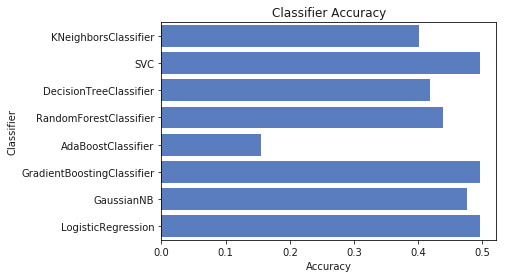

In [38]:
#Save to dataframe and plot model:accuracies
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Testing

In [50]:
#Choosing SVC classfier (highest accuracy) to predict on test data
chosen_classifier= SVC()
chosen_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
#Accuracy of model
test_predictions = chosen_classifier.predict(x_test)
acc = accuracy_score(y_test, test_predictions)
print ("Accuracy: ", acc)

Accuracy:  0.5104166666666666


Analysis

Since user_ratings had several unqiue values between 1~5, this was a multi-class classification model hence coupled with a relatively small dataset, a low accuracy was attained. User_ratings can be split into two bins (bad:0~3, good:3~5) and removing neutral ratings (user_rating: 3) would allow for a binary classification model to attain a higher level of accuracy. However, this would not allow for much business value where user_ratings of higher positive value (user rating>4) is of importance.

Trying linear regression model by treating user ratings as continuous (0~5)

In [35]:
from sklearn import linear_model

In [36]:
regr= linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
from sklearn.metrics import r2_score
pred=regr.predict(x_test)
acc=r2_score(y_test,pred)
print (acc)

0.46562902395941175


The linear regression model performs similar to the classfication model.